# Customer Segmentation using K-Means clustering

The aim is to build a model which segment the customers based on their recency, frequency and monetary
<br>
<ul>
<li>Recency: How recently customers made their purchase.</li>
<li>Frequency: For simplicity, we’ll count the number of times each customer made a purchase.</li>
<li>Monetary: The total amount of money they spent.</li>
</ul>

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#Reading the dataset
df = pd.read_csv('data/customers.csv')

In [7]:
df.head()

,CustomerID,Recency,Frequency,Monetary
0,15619,11,1,337.0
1,17389,1,34,31852.0
2,14450,181,3,485.0
3,15727,17,7,5220.0
4,15790,11,1,225.0


#### Explore the dataset using Seaborn

Let’s look at the features of our dataset using a distribution chart to have a better understanding of the dataset.

<AxesSubplot:xlabel='Monetary', ylabel='Count'>

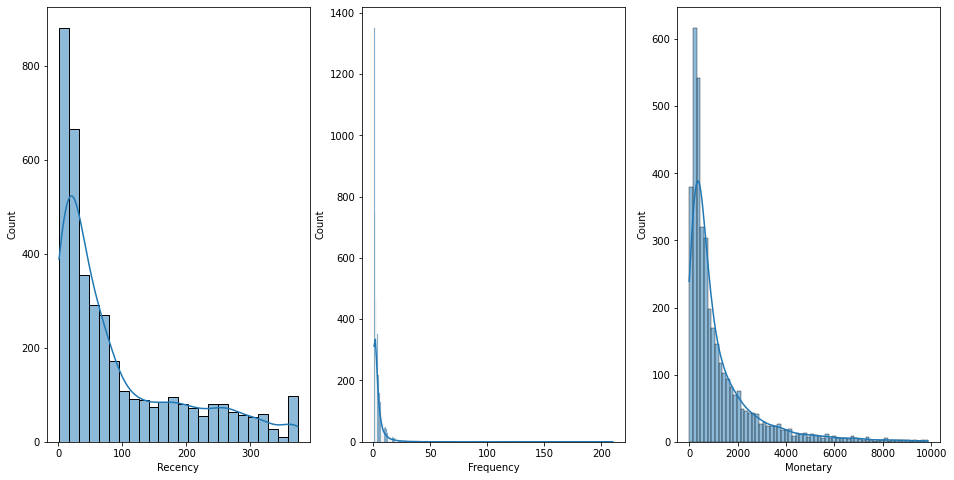

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(16, 8))

# Recency distribution plot
sns.histplot(df['Recency'], kde=True, ax=ax[0])

# Frequency distribution plot
sns.histplot(df.query('Frequency < 1000')['Frequency'], kde=True, ax=ax[1])

# Monetary distribution plot
sns.histplot(df.query('Monetary < 10000')['Monetary'], kde=True, ax=ax[2])

### Feature Engineering

In the following code we perform these feature engineering steps:
    <ul>
    <li>
Remove zero and negative values from the Monetary column
</li>
<li>
Vectorize all the features (mandatory for K-Means from Spark ML to work)
</li>
<li>
Standardize the feature-vector
</li>
<ul>

In [10]:
# Remove zero and negative numbers
customeer_data = (
    df.withColumn("Monetary", 
        F.when(F.col("Monetary") <= 0, 1)
         .otherwise(F.col("Monetary")))
)


# Identifying feature columns
features = customeer_data.columns[1:]

# vectorize all the features
assembler = VectorAssembler(
    inputCols=features, 
    outputCol="rfm_features")

assembled_data = assembler.transform(customeer_data)
assembled_data = assembled_data.select(
    'CustomerID', 'rfm_features')

# Standardization
scaler = StandardScaler(
inputCol='rfm_features',
outputCol='rfm_standardized')
data_scale = scaler.fit(assembled_data)
scaled_data = data_scale.transform(assembled_data)

AttributeError: 'DataFrame' object has no attribute 'withColumn'